# IBS 574 Python Homework 3

#### Add your name and the date your notebook was last updated

In [1]:
%reload_ext watermark
%watermark -a "Jessica Randall" -d -u -n -t -z

Jessica Randall 
last updated: 2020-02-09 14:22:10 Eastern Standard Time


#### Load libraries

In [2]:
import pandas as pd 
import numpy as np
from sinfo import sinfo
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data
note: include test for this chunk from previous homework

In [3]:
countdata = "https://raw.githubusercontent.com/jessmrandall/IBS574Spring2020/master/data/countdata.csv"
counts = pd.read_csv(countdata, index_col = 0, sep = "\t")
len(counts) == 14944

True

#### Prepare data for PCA Analysis

In [4]:
counts_transpose = counts.T
len(counts_transpose) == 14

group = ["Control", "Control", "Control", "Control", "Control", "Control", "Control",
        "Case", "Case", "Case", "Case", "Case","Case", "Case",]

counts_transpose["group"] = group

features = pd.Series(counts_transpose.columns)[0:14944]

feature_arr = counts_transpose.loc[:, features].values

target_arr = counts_transpose.loc[:, ["group"]].values

fitted_features = StandardScaler().fit_transform(feature_arr)

#### Determine Principal Components
note: include test for this chunk from previous homework

In [5]:
random.seed(888)

pca = PCA(n_components = 2, random_state = 888)

principalComponents = pca.fit_transform(fitted_features)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

principalDataframe.index = counts_transpose.index

targetDataframe = counts_transpose[["group"]]

newDataframe = pd.concat([principalDataframe, targetDataframe], axis = 1)

principalDataframe["PC1"].max() == 126.57815113747459

True

#### Graph the principal components by sample group

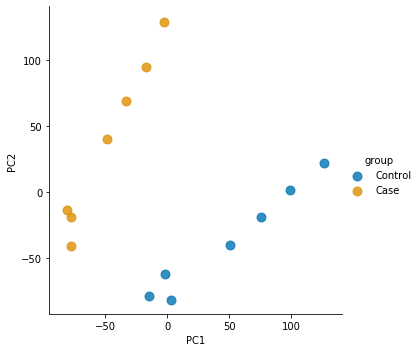

In [16]:
sns.lmplot( x="PC1", y="PC2",
           data=newDataframe, #dataset to pull from
           fit_reg=False, #don't fit regression line
           hue='group', # color by sample group
           legend=True, #include legend
           scatter_kws={"s": 80}, # specify the point size
           palette="colorblind") # color palette

#### Interpret the graph for your principal investigator using explained variance

In [7]:
pca.explained_variance_ratio_

array([0.39218002, 0.36808828])

Aproximately 39% of the variability between these sample groups is explained by a sample being either a case or a control. A similar amount of variability, 37%, can be attributed to another variable unaccounted for in the experimental design.

#### Report Session Information


In [8]:
sinfo()

-----
matplotlib  3.1.1
numpy       1.18.1
pandas      0.25.3
seaborn     0.9.0
sinfo       0.3.1
sklearn     0.22.1
-----
IPython             7.11.1
jupyter_client      5.3.4
jupyter_core        4.6.1
jupyterlab          1.2.5
notebook            6.0.2
-----
Python 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.18362-SP0
12 logical CPU cores, AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD
-----
Session information updated at 2020-02-09 14:22
